In [1]:
from datetime import datetime, timezone, timedelta
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
import plotting_functions as pltfuns
import atm_functions as atmfuns
import init_funs as initfuns
from get_PFM_info import get_PFM_info
from util_functions import s_coordinate_4
from util_functions import display_timing_info

import pickle
import os
import pprint
import subprocess


/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:27: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [2]:
ocnfuns.mk_LV2_BC_dict_edges('4')




OCN_LV3_BC dict loaded with pickle
angle2
[[ 0.16553483  0.16553483  0.16553506  0.16553528  0.1655355 ]
 [ 0.16553488  0.16553488  0.16553511  0.16553533  0.16553554]
 [ 0.16553492  0.16553492  0.16553515  0.16553537  0.16553559]
 [ 0.16553497  0.16553497  0.16553519  0.16553541  0.16553563]
 [-0.27606263 -0.27606263  0.1655352   0.16553542  0.16553564]]
[[ 0.16553483  0.16553495  0.16553517  0.16553539  0.16553561]
 [ 0.16553488  0.16553499  0.16553522  0.16553543  0.16553565]
 [ 0.16553492  0.16553504  0.16553526  0.16553548  0.16553569]
 [ 0.16553497  0.16553508  0.1655353   0.16553552  0.16553574]
 [-0.27606263 -0.05526372  0.16553531  0.16553553  0.16553574]]
[[ 0.16553481  0.16553481  0.16553504  0.16553526  0.16553548]
 [ 0.16553486  0.16553486  0.16553508  0.16553531  0.16553552]
 [ 0.1655349   0.1655349   0.16553513  0.16553535  0.16553556]
 [ 0.16553494  0.16553494  0.16553517  0.16553539  0.16553561]
 [-0.05526383 -0.05526383  0.1655352   0.16553542  0.16553563]]
[[0.165521

In [3]:
PFM = get_PFM_info()
lv4_ocnBC_pckl = PFM['lv4_forc_dir'] + '/' + PFM['lv4_ocnBC_tmp_pckl_file']
lv4_bc_file_out =  PFM['lv4_forc_dir'] + '/' + PFM['lv4_bc_file']

ocnfuns.ocn_roms_BC_dict_to_netcdf_pckl(lv4_ocnBC_pckl,lv4_bc_file_out)


OCN_BC dict loaded with pickle

max and min of data in ROMS BC file (iz is bottom [0] to top [39]):
max zeta_north =  1.000 m          at  ( it, ilon)     =  ( 52,  28)
min zeta_north = -0.830 m          at  ( it, ilon)     =  ( 59,  28)
max zeta_south =  0.984 m          at  ( it, ilon)     =  ( 52, 378)
min zeta_south = -0.827 m          at  ( it, ilon)     =  ( 59, 360)
max zeta_west  =  0.994 m          at  ( it, ilat)     =  ( 52,1141)
min zeta_west  = -0.820 m          at  ( it, ilat)     =  ( 59,1131)
max ubar_north =  0.095 m/s        at  ( it, ilon)     =  ( 30,   8)
min ubar_north = -0.076 m/s        at  ( it, ilon)     =  ( 11,  19)
max ubar_south =  0.047 m/s        at  ( it, ilon)     =  ( 22,   0)
min ubar_south = -0.046 m/s        at  ( it, ilon)     =  ( 31,   0)
max ubar_west  =  0.116 m/s        at  ( it, ilat)     =  ( 27,1100)
min ubar_west  = -0.104 m/s        at  ( it, ilat)     =  (  6, 163)
max vbar_north =  0.244 m/s        at  ( it, ilon)     =  ( 29,  11)
min

In [7]:
x=[0,1,2,3,4,5]
print(x)
y=x[::len(x)-1]
print(y)

[0, 1, 2, 3, 4, 5]
[0, 5]


In [2]:
ocnfuns.mk_LV2_BC_dict('4')

we are remaking the PFM.pkl file...
getting PFM info...
removing PFM info file...
we are not adding tidal forcing as Hycom includes tides.
PFM info was saved as /scratch/PFM_Simulations/PFM_run_info.pkl
OCN_LV3_BC dict loaded with pickle
interpolating z with normal loops.


Traceback (most recent call last):
  File "/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py", line 6211, in <module>
    globals()[args[1]](*args[2:])
  File "/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py", line 5312, in mk_LV2_BC_dict
    with open(fn_out,'wb') as fout:
              ^^^^^^
UnboundLocalError: cannot access local variable 'fn_out' where it is not associated with a value


In [4]:
fn_bc3 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC.nc'
fn_gr3 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV3_rx020.nc'
fn_ic4 = '/scratch/matt/sdtjre_L4/IC_LV4_2016121100_tide_DK_4river_Nz10.nc'
fn_clm4 = '/scratch/matt/sdtjre_L4/ocean_clm_20180101_DK_4river_Nz10.nc'
fn_bc4 = '/scratch/matt/sdtjre_L4/BC_LV4_20161207_20170804_Nz10_dye.nc'
fn_bc4_new = '/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_OCEAN_BC.nc'

fn_nud4 = '/scratch/matt/sdtjre_L4/ocean_nudcoef_DK_4river_10day_Nz10.nc'
fn_tr4 = '/scratch/matt/sdtjre_L4/river_tracer_4river_NADB2017_0.nc'

fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_ROTATE_rx020_hplus020_DK_4river_otaymk.nc'
fn_gr4_new = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'


bcl3 = netCDF4.Dataset(fn_bc3)
bcl4 = netCDF4.Dataset(fn_bc4_new)
gr4  = netCDF4.Dataset(fn_gr4)
gr4_new  = netCDF4.Dataset(fn_gr4_new)


print(gr4_new['depthmin'][:])
print(gr4_new['depthmax'][:])
ocnfuns.ncdisp(fn_gr4_new)

#pprint.pp(bcl3.variables.keys())
#pprint.pp(bcl4.variables.keys())

#print(gr4['angle'][-4:,0:4])
#print(gr4.variables.keys())
#print(gr4['dndx'][-4:,0:4])
#print(gr4['dmde'][-4:,0:4])


-1.0
76.0
Source:
	/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc
Format:
	netcdf4
Global Attributes:
	type   = 'ocean grid file for roms'
	author = 'matthew spydell'
Dimensions:
	er = 1141
	xr = 486
	eu = 1141
	xu = 485
	ev = 1140
	xv = 486
	ep = 1140
	xp = 485
Variables:
	xl
		Size:       1x1
		Dimensions: 
		Datatype:   float64
		Attributes:
		            _FillValue = nan
		            long_name  = 'domain length in the XI-direction'
		            units      = 'meter'
	el
		Size:       1x1
		Dimensions: 
		Datatype:   float64
		Attributes:
		            _FillValue = nan
		            long_name  = 'domain length in the ETA-direction'
		            units      = 'meter'
	JPRJ
		Size:       1x1
		Dimensions: 
		Datatype:   <class 'str'>
		Attributes:
		            long_name = 'map projection type'
		            option_ME = 'Mercator'
		            option_ST = 'Stenographic'
		            option_LC = 'Lambert conformal conic'
	spherical
		Size:       1x1
		Dimensions: 
		D

In [4]:
dum = 's'
if isinstance(dum,str):
    print('string')

string


In [ ]:




gr4_dict = ocnfuns.netcdf_to_dict(fn_gr4)
print(gr4_dict['JPRJ']['data'])
print(gr4_dict['spherical']['data'])
el = gr4['el'][:]
print(el)
print(type(el))
print(el.data)
print(gr4_dict.keys())
print(gr4_dict['xl']['data'][:])
print()

#dy = gr4['y_rho'][-1,:] -gr4['y_rho'][0,:]
#dx = gr4['x_rho'][:,-1] -gr4['x_rho'][:,0]
#print( np.max(gr4['y_rho'][:])-np.min(gr4['y_rho'][:]) )
#print( np.max(gr4['x_rho'][:])-np.min(gr4['x_rho'][:]) )

#gr4d_new = ocnfuns.LV4grid_to_new()
#ocnfuns.LV4grid_to_new_dotnc(fn_gr4_new)
#ocnfuns.dict_to_netcdf(gr4d_new, fn_gr4_new)

gr4_new = netCDF4.Dataset(fn_gr4_new)
print(gr4)
print(gr4_new)
print(gr4.variables.keys())
print(gr4_new.variables.keys())


Text(0.5, 1.0, 'LV grid')

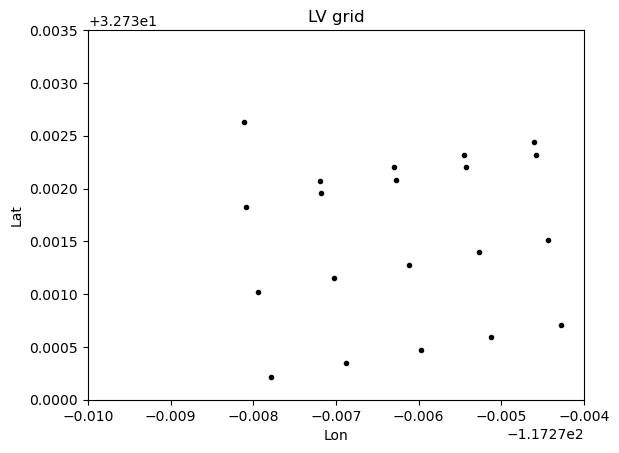

In [21]:
fig, ax = plt.subplots()
p1=ax.plot(gr4['lon_rho'][:],gr4['lat_rho'][:],'k.')
plt.xlim([-117.28,-117.274])
plt.ylim([32.73,32.7335])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.title('LV grid')


Text(0.5, 1.0, 'LV grid new')

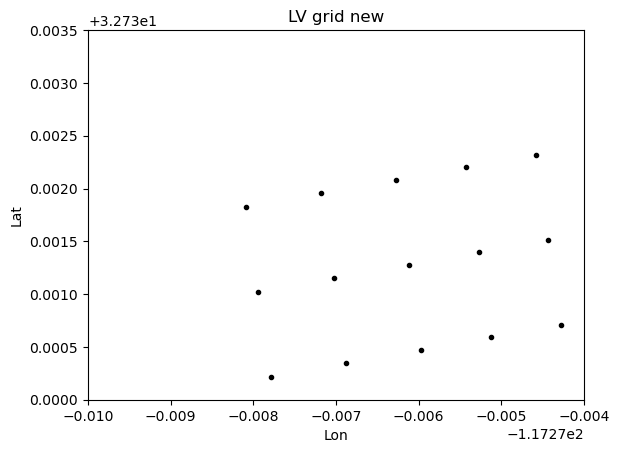

In [4]:
fig, ax = plt.subplots()
p1=ax.plot(gr4_new['lon_rho'][:],gr4_new['lat_rho'][:],'k.')
plt.xlim([-117.28,-117.274])
plt.ylim([32.73,32.7335])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.title('LV grid new')

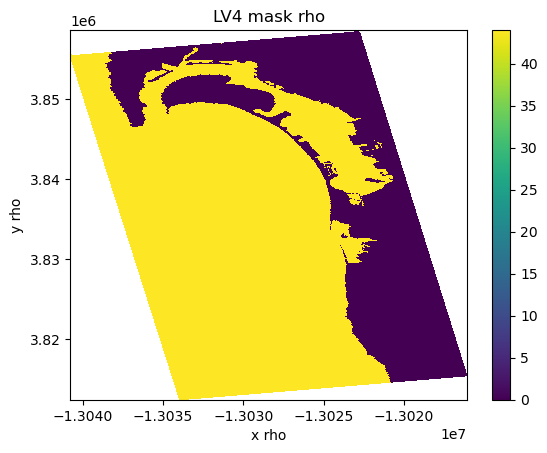

In [12]:
fig, ax = plt.subplots()
#p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
#plt.xlim([-1.304085e7,-1.30401e7])
#plt.ylim([3.85519e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


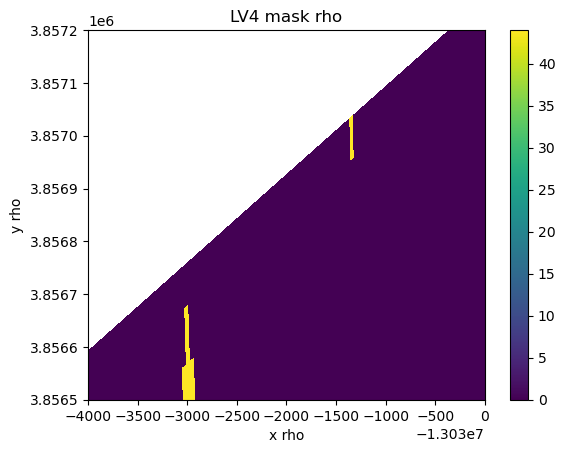

In [14]:
fig, ax = plt.subplots()
#p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.3034e7,-1.303e7])
plt.ylim([3.8565e6,3.8572e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)


In [9]:
print(np.shape(gr4['mask_rho']))
print('indices: [-4:,120:170]')
print('mask rho')
print(gr4['mask_rho'][-4:,120:170])
print('mask u')
print(gr4['mask_u'][-4:,120:170])
print('mask v')
print(gr4['mask_v'][-4:,120:170])
print('mask psi')
print(gr4['mask_psi'][-4:,120:170])

print('indices: [-4:,168]')
print('mask rho')
print(gr4['mask_rho'][-4:,168])
print('mask u')
print(gr4['mask_u'][-4:,168])
print('mask v')
print(gr4['mask_v'][-4:,168])
print('mask psi')
print(gr4['mask_psi'][-4:,168])

print('indices: [-2:-1,:]')
print('mask rho')
print(gr4['mask_rho'][-2:-1,:])
print('mask u')
print(gr4['mask_u'][-2:-1,:])
print('mask v')
print(gr4['mask_v'][-2:-1,:])
print('mask psi')
print(gr4['mask_psi'][-2:-1,:])

print('indices: [-2:-1,168]')
print('mask rho')
print(gr4['mask_rho'][-2:-1,168])

dy = gr4['y_rho'][1:,:] -gr4['y_rho'][0:-1,:]

print('indices: [-4:,0:4]')
print('angle')
print(gr4['angle'][-4:,0:4])
print('dmde')
print(gr4['dmde'][-4:,0:4])
print('pn')
print(gr4['pn'][-4:,0:4])
print('1/pn')
print(1/gr4['pn'][-4:,0:4])
print('dy')
print(dy[-4:,0:4])

(1142, 486)
indices: [-4:,120:170]
mask rho
[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]
mask u
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0

In [ ]:

fig, ax = plt.subplots()
p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=0,vmax=44)
p1=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['mask_rho'][:])

#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
#p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.3041e7,-1.302e7])
plt.ylim([3.855e6,3.859e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 mask rho')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)

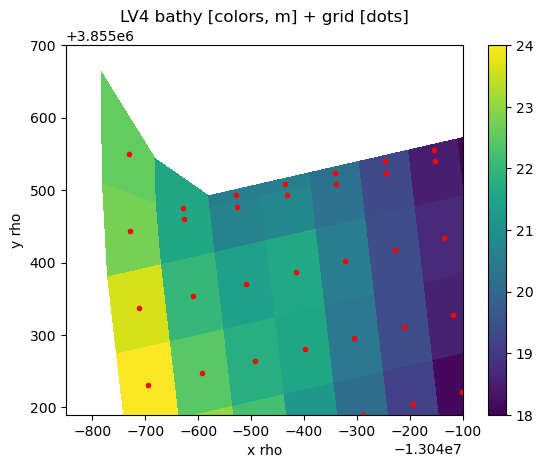

In [3]:


fig, ax = plt.subplots()
p0=ax.pcolor(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],vmin=18,vmax=24)
#p0=ax.contourf(gr4['x_rho'][:],gr4['y_rho'][:],gr4['h'][:],15)
p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'r.')
plt.xlim([-1.304085e7,-1.30401e7])
plt.ylim([3.85519e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV4 bathy [colors, m] + grid [dots]')
fig.colorbar(p0,ax=ax)
#plt.clim(20,24)

In [ ]:
fig, ax = plt.subplots()

p1=ax.plot(gr4['x_rho'][:],gr4['y_rho'][:],'k.')
plt.xlim([-1.3041e7,-1.304e7])
plt.ylim([3.8553e6,3.8557e6])
plt.xlabel('x rho')
plt.ylabel('y rho')
plt.title('LV grid')

In [38]:
dx = gr4['x_rho'][:,1:] -gr4['x_rho'][:,0:-1]
dy = gr4['y_rho'][:,1:] -gr4['y_rho'][:,0:-1]
ang_c = 180 / np.pi * np.arctan(dy/dx)

print(ang_c[-3:,0:4])
print(180/np.pi*gr4['angle'][-3:,0:4])
print(gr4['h'][-3:,0:4])

[[9.484445704594458 9.484459056734934 9.484471899984356 9.484484298425746]
 [9.484448218116068 9.484461569873336 9.48447441388806 9.484486811503542]
 [-36.06761271083998 9.48446193672926 9.484474781493287 9.484487180155917]]
[[  9.48445238   9.48445238   9.48446548   9.4844781 ]
 [  9.48445489   9.48445489   9.48446799   9.48448061]
 [-15.81722384 -15.81722384   9.48446836   9.48448098]]
[[23.62285325 21.99881981 21.37725271 21.59235871]
 [22.74928274 21.57262081 20.67244786 20.78255374]
 [22.56900786 21.5193133  20.56380396 20.54438318]]


In [8]:
print(bcl4['ubar_south'][0,0:10])
print(bcl4['vbar_south'][0,0:10])
print(bcl4['u_south'][0,0,0:10])
print(bcl4['v_south'][0,0,0:10])
print(bcl3['u_south'][0,0,0:10])
print(bcl3['v_south'][0,0,0:10])


[-0.00749322 -0.00761675 -0.00774055 -0.00783121 -0.0079039  -0.00794792
 -0.00787619 -0.00778383 -0.0077286  -0.00769358]
[0.08994491 0.08907894 0.08817176 0.08728798 0.08638031 0.0853406
 0.08428121 0.08317497 0.08202091 0.08087804]
[-35.91038518 -37.33289013 -38.80770408 -40.23511939 -41.62519999
 -42.94523233 -43.87134299 -44.90172504 -45.82759539 -46.64888041]
[-35.04563641 -36.62050289 -37.85964106 -39.62487054 -40.67862118
 -42.43731821 -43.37490468 -44.31754221 -45.34929879 -46.17231592]
[0.03142638 0.03119439 0.0309624  0.03073041 0.03049843 0.03026644
 0.03003448 0.02980252 0.02957056 0.02933859]
[-0.00341608 -0.00333372 -0.00325137 -0.00316898 -0.00308659 -0.00300419
 -0.00282081 -0.00263742 -0.00245403 -0.00227064]


In [ ]:



gr3 = netCDF4.Dataset(fn_gr3)
gr4 = netCDF4.Dataset(fn_gr4)

fig, ax = plt.subplots()
p1=ax.plot(gr3['lon_rho'][:],gr3['lat_rho'][:],'k.')
p1=ax.plot(gr4['lon_rho'][:],gr4['lat_rho'][:],'r.')


In [31]:
t_dye = bcl4['dye_time'][:]
d1_n = bcl4['dye_south_02'][:]


print(t_dye)
print(d1_n[:,1:10,1:10])


[6550.5 6790.5]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [88]:
clm4 = netCDF4.Dataset(fn_clm4)
pprint.pp(clm4.variables.keys())

d1 = clm4['dye_01'][:]
td1 = clm4['dye_time'][:]
print(td1)
print(clm4['temp_time'][:])
print(clm4['salt_time'][:])
print(np.shape(d1))

print(d1[0,-1,0,:])
print(clm4['salt'][1,-1,300,:])
print(clm4['temp'][1,-1,300,:])
print(clm4['Vtransform'][:])
print(clm4['Vstretching'][:])
print(clm4['theta_s'][:])
print(clm4['theta_b'][:])
print(clm4['Tcline'][:])
print(clm4['hc'][:])


dict_keys(['spherical', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'temp_time', 'salt_time', 'temp', 'salt', 'dye_time', 'dye_01', 'dye_02'])
[6544.5 6940.5]
[6544.5 6940.5]
[6544.5 6940.5]
(2, 10, 1142, 486)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

In [46]:
nud4 = netCDF4.Dataset(fn_nud4)
pprint.pp(nud4.variables.keys())
print(np.shape(nud4['temp_NudgeCoef'][:]))
print(nud4['temp_NudgeCoef'][0,500,:])
print(nud4['salt_NudgeCoef'][0,500,:])
print(nud4['tracer_NudgeCoef'][0,500,:])

dict_keys(['spherical', 'lat_rho', 'lon_rho', 'temp_NudgeCoef', 'salt_NudgeCoef', 'tracer_NudgeCoef'])
(10, 1142, 486)
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -

In [48]:
ic4 = netCDF4.Dataset(fn_ic4)
pprint.pp(ic4.variables.keys())


dict_keys(['spherical', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'ocean_time', 'salt', 'temp', 'u', 'ubar', 'v', 'vbar', 'zeta', 'sand_01', 'sandfrac_01', 'sandmass_01', 'bed_thickness', 'bed_age', 'bed_porosity', 'bed_biodiff', 'grain_diameter', 'grain_density', 'settling_vel', 'erosion_stress', 'ripple_length', 'ripple_height', 'dmix_offset', 'dmix_slope', 'dmix_time'])


dict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'river', 'river_time', 'river_Xposition', 'river_Eposition', 'river_direction', 'river_Vshape', 'river_transport', 'river_flag', 'river_temp', 'river_salt', 'river_dye_01', 'river_dye_02'])
(9,)
[1.0 -- -- -- -- -- -- -- --]
(9457,)
(9,)
[433. 433. 433. 433. 433. 337. 464. 464. 439.]
[614. 615. 613. 616. 612.  76. 961. 962. 779.]
(9,)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10, 9)
(9457, 9)
(9,)
[3. 3. 3. 3. 3. 3. 3. 3. 3.]
(9457, 10, 9)
[0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[[0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0

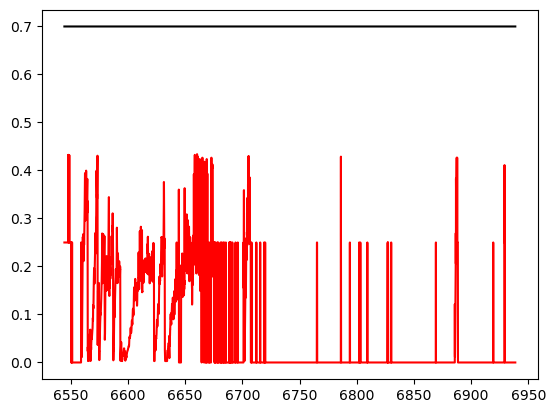

In [87]:
tr4 = netCDF4.Dataset(fn_tr4)
gr4 = netCDF4.Dataset(fn_gr4)
pprint.pp(tr4.variables.keys())
print(np.shape(tr4['river'][:]))
print(tr4['river'][:])
print(np.shape(tr4['river_time'][:]))
print(np.shape(tr4['river_Xposition'][:]))
print(tr4['river_Xposition'][:])
print(tr4['river_Eposition'][:])
print(np.shape(tr4['river_direction'][:]))
print(tr4['river_direction'][:])
print(np.shape(tr4['river_Vshape'][:]))
#print(tr4['river_Vshape'][:])
print(np.shape(tr4['river_transport'][:]))
print(np.shape(tr4['river_flag'][:]))
print(tr4['river_flag'][:])
print(np.shape(tr4['river_temp'][:]))
print(tr4['river_dye_01'][-1,:,5])
print(tr4['river_dye_02'][0,:,:])

fig, ax = plt.subplots()
p1=ax.plot(tr4['river_time'][:],tr4['river_dye_01'][:,0,5],'k')
p1=ax.plot(tr4['river_time'][:],tr4['river_dye_02'][:,0,0],'r')


In [ ]:

fig, ax = plt.subplots()
p0=ax.imshow(gr4['mask_rho'], interpolation='none',origin='lower')
p1=ax.plot(tr4['river_Xposition'][:],tr4['river_Eposition'][:],'ro')



In [ ]:

fig, ax = plt.subplots()
p0=ax.imshow(d1_n[1,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='right')
plt.axis('auto')
